In [1]:
import numpy as np
import torch.nn as nn
import numpy as np
import torch
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import DataLoader
import gc
import os 
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor
import os
# from transformers import AutoTokenizer
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC
from datasets import Dataset
import torchaudio
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import youtokentome as yttm

In [2]:
input_folder_path = "/storage/student5/xuan_quy/asrdata/txt"

# Define a temporary file to combine the inputs
combined_text_path = "combined_vietnamese_text.txt"

# Define the path to save your trained BPE model
bpe_model_path = "vietnamese_bpe.model"

# vocab_size = 8000 
vocab_size = 10000
# #Calulating the vocab size (unique words) in the text files:
# vocab_size = 0 
# for file in os.listdir(input_folder_path):
#     with open(os.path.join(input_folder_path, file), 'r') as f:
#         for line in f:
#             vocab_size += len(line.split())
# print(vocab_size)


In [3]:

import os
from pathlib import Path

# Path to the folder containing your Vietnamese text files
input_folder_path = "/storage/student5/xuan_quy/asrdata/txt"

# Define a temporary file to combine the inputs
combined_text_path = "combined_vietnamese_text.txt"

# Define the path to save your trained BPE model
bpe_model_path = "vietnamese_bpe.model"

# Set the desired vocabulary size
  # Adjust this based on your requirements

# Combine all text files in the folder into one temporary file
with open(combined_text_path, "w") as outfile:
    for file_path in Path(input_folder_path).glob("*.txt"):
        with open(file_path, "r") as infile:
            outfile.write(infile.read() + "\n")

# Train the BPE model using the combined file
yttm.BPE.train(data=combined_text_path, vocab_size=vocab_size, model=bpe_model_path)

# Optionally remove the temporary combined file
os.remove(combined_text_path)

print(f"BPE model trained and saved at: {bpe_model_path}")


BPE model trained and saved at: vietnamese_bpe.model


Training parameters
  input: combined_vietnamese_text.txt
  model: vietnamese_bpe.model
  vocab_size: 10000
  n_threads: 8
  character_coverage: 1
  pad: 0
  unk: 1
  bos: 2
  eos: 3

reading file...
learning bpe...
number of unique characters in the training data: 96
number of deleted characters: 0
number of unique characters left: 96
id: 1000=112+374              freq: 519         subword: ▁chấp=▁ch+ấp
id: 2000=109+26               freq: 91          subword: ▁hô=▁h+ô
id: 3000=108+416              freq: 28          subword: ▁lốt=▁l+ốt
id: 4000=680+5                freq: 11          subword: ▁hãn=▁hã+n
id: 5000=3348+16              freq: 5           subword: ▁nhẽo=▁nhẽ+o
id: 6000=119+691              freq: 3           subword: ▁gấm=▁g+ấm
id: 7000=113+295              freq: 2           subword: ▁nục=▁n+ục
id: 8000=4522+3849            freq: 1           subword: nedy=ne+dy
id: 9000=104+633              freq: 1           subword: ▁đúp=▁đ+úp
WARNING merged only: 9408 pairs of tokens
model 

In [4]:
# Load the trained BPE model
bpe = yttm.BPE(model="vietnamese_bpe.model")
# Example Vietnamese sentence
sentence = "Tôi muốn học máy học và trí tuệ nhân tạo."

# Encode the sentence to BPE tokens
encoded = bpe.encode(sentence, output_type=yttm.OutputType.ID)
print("Encoded IDs:", encoded)

# Encode the sentence to BPE subword tokens
subwords = bpe.encode(sentence, output_type=yttm.OutputType.SUBWORD)
print("Encoded Subwords:", subwords)

# Decode the encoded IDs back to the original sentence
decoded = bpe.decode(encoded)
print("Decoded Sentence:", decoded[0])


Encoded IDs: [4, 1, 169, 508, 305, 757, 305, 131, 842, 2283, 318, 588, 1]
Encoded Subwords: ['▁', 'T', 'ôi', '▁muốn', '▁học', '▁máy', '▁học', '▁và', '▁trí', '▁tuệ', '▁nhân', '▁tạo', '.']
Decoded Sentence: <UNK>ôi muốn học máy học và trí tuệ nhân tạo<UNK>


In [6]:
from torch.nn.utils.rnn import pad_sequence
from pathlib import Path
import torch
from tqdm import tqdm
dataset = {}
def encode_text_file(file_path, bpe):
    with open(file_path, "r") as f:
        text = f.read().strip()
    # Encode the text to a list of subword IDs
    token_ids = bpe.encode(text, output_type=yttm.OutputType.ID)
    return torch.tensor(token_ids, dtype=torch.long)
 
 
bpe = yttm.BPE(model=bpe_model_path)
# Collect and encode all files
encoded_texts = []
for i in range(len(os.listdir(input_folder_path))):
    encoded_texts.append(encode_text_file(f'{input_folder_path}/{i}.txt', bpe))
    print(f"Encoded {i}.txt")

dataset['target'] = encoded_texts
print(f"data: {dataset['target']}") 

Encoded 0.txt
Encoded 1.txt
Encoded 2.txt
Encoded 3.txt
Encoded 4.txt
Encoded 5.txt
Encoded 6.txt
Encoded 7.txt
Encoded 8.txt
Encoded 9.txt
Encoded 10.txt
Encoded 11.txt
Encoded 12.txt
Encoded 13.txt
Encoded 14.txt
Encoded 15.txt
Encoded 16.txt
Encoded 17.txt
Encoded 18.txt
Encoded 19.txt
Encoded 20.txt
Encoded 21.txt
Encoded 22.txt
Encoded 23.txt
Encoded 24.txt
Encoded 25.txt
Encoded 26.txt
Encoded 27.txt
Encoded 28.txt
Encoded 29.txt
Encoded 30.txt
Encoded 31.txt
Encoded 32.txt
Encoded 33.txt
Encoded 34.txt
Encoded 35.txt
Encoded 36.txt
Encoded 37.txt
Encoded 38.txt
Encoded 39.txt
Encoded 40.txt
Encoded 41.txt
Encoded 42.txt
Encoded 43.txt
Encoded 44.txt
Encoded 45.txt
Encoded 46.txt
Encoded 47.txt
Encoded 48.txt
Encoded 49.txt
Encoded 50.txt
Encoded 51.txt
Encoded 52.txt
Encoded 53.txt
Encoded 54.txt
Encoded 55.txt
Encoded 56.txt
Encoded 57.txt
Encoded 58.txt
Encoded 59.txt
Encoded 60.txt
Encoded 61.txt
Encoded 62.txt
Encoded 63.txt
Encoded 64.txt
Encoded 65.txt
Encoded 66.txt
Encod

In [8]:
audio_file_path = "/storage/student5/xuan_quy/asrdata/wav/"
from pathlib import Path

train = []
def extract_audio_features(file_path):
    # Load the audio file
    waveform, sample_rate = torchaudio.load(file_path)
    spectrogram = torchaudio.transforms.MelSpectrogram(sample_rate=16000, n_fft= 1024,n_mels=64)(waveform)
    return spectrogram.squeeze(0).transpose(0, 1)

# audio = extract_audio_features(audio_file_path)
# print(audio.shape)
for i in range(len(os.listdir(audio_file_path))):
    
    audio = extract_audio_features(f'{audio_file_path}/{i}.wav')
    print(f"Processed audio file: {i}.wav")
    print("Shape:", audio.shape)
    print("")
    train.append(audio)

# Pad the audio features to the length of the longest sequence
dataset['features'] = train

Processed audio file: 0.wav
Shape: torch.Size([272, 64])

Processed audio file: 1.wav
Shape: torch.Size([98, 64])

Processed audio file: 2.wav
Shape: torch.Size([200, 64])

Processed audio file: 3.wav
Shape: torch.Size([353, 64])

Processed audio file: 4.wav
Shape: torch.Size([192, 64])

Processed audio file: 5.wav
Shape: torch.Size([296, 64])

Processed audio file: 6.wav
Shape: torch.Size([421, 64])

Processed audio file: 7.wav
Shape: torch.Size([310, 64])

Processed audio file: 8.wav
Shape: torch.Size([355, 64])

Processed audio file: 9.wav
Shape: torch.Size([580, 64])

Processed audio file: 10.wav
Shape: torch.Size([464, 64])

Processed audio file: 11.wav
Shape: torch.Size([194, 64])

Processed audio file: 12.wav
Shape: torch.Size([313, 64])

Processed audio file: 13.wav
Shape: torch.Size([101, 64])

Processed audio file: 14.wav
Shape: torch.Size([323, 64])

Processed audio file: 15.wav
Shape: torch.Size([43, 64])

Processed audio file: 16.wav
Shape: torch.Size([628, 64])

Processed

In [10]:
print(dataset['features'][0].shape)

torch.Size([272, 64])


In [ ]:
# x =torch.load('padded_audio.pt')
y = torch.load('padded_encoded_texts.pt')
# print(x[0])
print(y[0])
# print(x.shape, y.shape)

tensor([1582, 3607, 1582, 1987,  135,  805,  124,  509,  135,  184, 1342, 1582,
        1147,  507,  186,  437,  176,  513, 1361,  477,  859,  263,  245, 1026,
         168,  124,  184,  166,  186,  161,  477,  859,  713,  263,  213,  307,
         587,  294,  184,  199,  154,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,   

/tmp/ipykernel_332469/3397330863.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  y = torch.load('padded_encoded_texts.pt')


NameError: name 'x' is not defined

In [9]:
x_train = x[:int(x.shape[0]*0.7),: , :]
y_train = y[:int(y.shape[0]*0.7), :]

x_val = x[:int(x.shape[0]*0.2),: ,: ]
y_val = y[:int(y.shape[0]*0.2) ,: ]

x_test = x[:int(x.shape[0]*0.1), :, :]
y_test = y[:int(y.shape[0]*0.1), :]

In [10]:
# print(x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape)

# np.save('x_train.npy', x_train)
np.save('y_train.npy', y_train)

# np.save('x_val.npy', x_val)
np.save('y_val.npy', y_val)

# np.save('x_test.npy', x_test)
np.save('y_test.npy', y_test)


In [ ]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# from torch.utils.data import DataLoader, Dataset
# from torchaudio.transforms import MFCC
# import numpy as np


# # QuartzNet Block Definition
# class QuartzNetBlock(nn.Module):
#     def __init__(self, in_channels, out_channels, kernel_size, repeat=10, dropout=0.2):
#         super(QuartzNetBlock, self).__init__()
#         self.layers = nn.Sequential(*[
#             nn.Sequential(
#                 nn.Conv1d(in_channels if i == 0 else out_channels, out_channels, kernel_size, padding=kernel_size // 2),
#                 nn.BatchNorm1d(out_channels),
#                 nn.ReLU(),
#                 nn.Dropout(dropout)
#             )
#             for i in range(repeat)
#         ])
#         self.residual = nn.Conv1d(in_channels, out_channels, 1)  # Residual connection

#     def forward(self, x):
#         return self.layers(x) + self.residual(x)

# # QuartzNet Model Definition
# class QuartzNet(nn.Module):
#     def __init__(self, num_features, num_classes, dropout=0.3):
#         super(QuartzNet, self).__init__()
#         self.encoder = nn.Sequential(
#             QuartzNetBlock(num_features, 64, kernel_size=33, dropout=dropout),
#             QuartzNetBlock(64, 128, kernel_size=39, dropout=dropout),
#             QuartzNetBlock(128, 256, kernel_size=41, dropout=dropout),
#             QuartzNetBlock(256, 512, kernel_size=41, dropout=dropout),
#             QuartzNetBlock(512, 512, kernel_size=41, dropout=dropout),
#         )
#         self.classifier = nn.Sequential(
#             nn.Conv1d(512, num_classes, kernel_size=1)
#         )

#     def forward(self, x):
#         x = self.encoder(x)
#         x = self.classifier(x)
        
#         # x = x.permute(2, 0, 1)  # Prepare for CTC loss (T, N, C)
#         return x    

# # Custom Dataset for Speech Data
# class SpeechDataset(Dataset):
#     def __init__(self, x_train, y_train):
#         self.x_train = x_train
#         self.y_train = y_train

#     def __len__(self):
#         return len(self.x_train)

#     def __getitem__(self, idx):
#         return self.x_train[idx], self.y_train[idx]

# # Data Collator for Padding
# def collate_fn(batch):
#     x_batch, y_batch = zip(*batch)
#     x_batch = [torch.tensor(x).permute(1,0) for x in x_batch]
#     y_batch = [torch.tensor(y) for y in y_batch]

#     # Pad MFCC features to the length of the longest sequence in the batch
#     x_batch = nn.utils.rnn.pad_sequence(x_batch, batch_first=True)  # (N, C, T)

#     # Calculate input lengths after padding
#     input_lengths = torch.tensor([x.size(-1) for x in x_batch])  # Lengths of each input (time dimension)

#     # Pad labels to the length of the longest sequence in the batch
#     y_batch = nn.utils.rnn.pad_sequence(y_batch, batch_first=True, padding_value=-100)  # -100 is ignored by CTC loss
#     target_lengths = torch.tensor([len(y) for y in y_batch])  # Lengths of each target

#     return x_batch, y_batch, input_lengths, target_lengths



In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torch.cuda.amp import GradScaler, autocast
import os
import numpy as np


class SeparableConv1d(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size):
        super().__init__()
        self.depthwise = nn.Conv1d(
            in_channels, in_channels, kernel_size,
            padding=kernel_size // 2,
            groups=in_channels
        )
        self.pointwise = nn.Conv1d(in_channels, out_channels, 1)

    def forward(self, x):
        x = self.depthwise(x)
        x = self.pointwise(x)
        return x


class QuartzNetBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, repeat=5, dropout=0.2):
        super().__init__()
        
        # Main branch
        self.layers = nn.ModuleList([
            nn.Sequential(
                SeparableConv1d(
                    in_channels if i == 0 else out_channels,
                    out_channels,
                    kernel_size
                ),
                nn.BatchNorm1d(out_channels),
                nn.ReLU(),
                nn.Dropout(p=dropout)
            ) for i in range(repeat)
        ])
        
        # Skip connection
        self.skip = None
        if in_channels != out_channels:
            self.skip = nn.Sequential(
                nn.Conv1d(in_channels, out_channels, 1),
                nn.BatchNorm1d(out_channels)
            )

    def forward(self, x):
        orig = self.skip(x) if self.skip is not None else x
        for layer in self.layers:
            x = layer(x)
        return x + orig

class QuartzNet(nn.Module):
    def __init__(self, num_features, num_classes, channels=[256, 256, 512, 512, 512], 
                 repeat=5, dropout=0.2):
        super().__init__()
        
        # Prologue
        self.prologue = nn.Sequential(
            nn.Conv1d(num_features, channels[0], 33, stride=2, padding=16),
            nn.BatchNorm1d(channels[0]),
            nn.ReLU(),
            nn.Dropout(p=dropout)
        )
        
        # Main blocks
        kernel_sizes = [33, 39, 51, 63, 75]
        blocks = []
        in_channels = channels[0]
        
        for i, (out_channels, kernel_size) in enumerate(zip(channels, kernel_sizes)):
            blocks.append(
                QuartzNetBlock(
                    in_channels, out_channels,
                    kernel_size, repeat=repeat,
                    dropout=dropout
                )
            )
            in_channels = out_channels
            
        self.encoder = nn.Sequential(*blocks)
        
        # Epilogue
        self.epilogue = nn.Sequential(
            nn.Conv1d(channels[-1], 1024, 1),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Dropout(p=dropout),
            nn.Conv1d(1024, num_classes, 1)
        )

    # def forward(self, x, input_lengths=None):
    def forward(self, x):
        # x shape: (batch, channels, time)
        x = self.prologue(x)
        
        # Adjust input lengths if provided
        # if input_lengths is not None:
        #     input_lengths = (input_lengths + 1) // 2
            
        x = self.encoder(x)
        x = self.epilogue(x)
        
        # Shape: (batch, num_classes, time)
        # return x, input_lengths
        return x

# class SpeechDataset(Dataset):
#     def __init__(self, x_train, y_train, sample_rate=16000):
#         self.x_train = x_train
#         self.y_train = y_train
#         self.mfcc = MFCC(
#             sample_rate=sample_rate,
#             n_mfcc=64,
#             melkwargs={'n_mels': 80, 'n_fft': 512, 'hop_length': 160}
#         )

#     def __len__(self):
#         return len(self.x_train)

#     def __getitem__(self, idx):
#         # Assuming x_train contains raw audio
#         audio = torch.tensor(self.x_train[idx])
#         features = self.mfcc(audio)
#         return features, torch.tensor(self.y_train[idx])

#     def get_x_y(self, idx):
#         return self.x_train[idx], self.y_train[idx]
class SpeechDataset(Dataset):
    def __init__(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train

    def __len__(self):
        return len(self.x_train)

    def __getitem__(self, idx):
        return self.x_train[idx], self.y_train[idx]
    
def collate_fn(batch):
    x_batch, y_batch = zip(*batch)
    x_batch = [torch.tensor(x).permute(1,0) for x in x_batch]
    y_batch = [torch.tensor(y) for y in y_batch]

    # Pad MFCC features to the length of the longest sequence in the batch
    x_batch = nn.utils.rnn.pad_sequence(x_batch, batch_first=True)  # (N, C, T)

    # Calculate input lengths after padding
    input_lengths = torch.tensor([x.size(-1) for x in x_batch])  # Lengths of each input (time dimension)

    # Pad labels to the length of the longest sequence in the batch
    y_batch = nn.utils.rnn.pad_sequence(y_batch, batch_first=True, padding_value=-100)  # -100 is ignored by CTC loss
    target_lengths = torch.tensor([len(y) for y in y_batch])  # Lengths of each target

    return x_batch, y_batch, input_lengths, target_lengths
# Training function
# def train_step(model, batch, criterion, optimizer, device, scaler =None):
#     features, labels, feature_lengths, label_lengths = [x.to(device) for x in batch]
    
#     optimizer.zero_grad()
#     # print(features)
#     # print(labels)
#     # Forward pass
#     with autocast(enabled=scaler is not None):
#         # print(features.shape)
#         logits= model(features)
#         # print(logits.shape)
#         # Prepare CTC loss
#         log_probs = torch.nn.functional.log_softmax(logits, dim=-1)
#         log_probs = log_probs.permute(1, 0, 2)
#         # log_probs = log_probs.transpose(0, 2, 1)  # (batch, time, num_classes)
        
#         # Calculate loss
#         loss = criterion(log_probs, labels, feature_lengths, label_lengths)
#     if scaler is not None:
#         scaler.scale(loss).backward()
        
#         scaler.unscale_(optimizer)
        
#         torch.nn.utils.clip_grad_norm_(model.parameters(), 10.0)

#         scaler.step(optimizer)
#         scaler.update()

#     else:
#         loss.backward()
#         torch.nn.utils.clip_grad_norm_(model.parameters(), 10.0)
#         optimizer.step()

#     return loss.item()

# def train(model, train_loader, criterion, optimizer, 
#           device, epochs=10, use_mixed_precision=True):
#     # Initialize gradient scaler for mixed precision training
#     scaler = GradScaler(enabled=use_mixed_precision)
#     train_losses = []
    
#     for epoch in range(epochs):
#         model.train()
#         total_loss = 0
        
#         for batch in train_loader:
#             loss = train_step(
#                 model, batch, criterion, optimizer, 
#                 device, scaler if use_mixed_precision else None
#             )
#             total_loss += loss
        
#         # Validation and logging can be added here
#         print(f'Epoch {epoch+1}, Average Loss: {total_loss / len(train_loader)}')
#         train_losses.append(total_loss / len(train_loader))

#         #construct checkpoint 
#         if (epoch + 1) % 5 == 0:
#             save_path = f"quartznet_checkpoint_{epoch + 1}.pt"
#             torch.save(model.state_dict(), save_path)

#     #save model
#     save_path = f"quartznet_{epochs}_4.pt"
#     torch.save(model.state_dict(), save_path)
    
#     return train_losses

# def plot_loss(train_losses):
#     plt.figure(figsize=(10, 5))
#     plt.plot(train_losses, label="Train Loss")
#     plt.xlabel("Epoch")
#     plt.ylabel("Loss")
#     plt.legend()
#     plt.show()

In [32]:
#split dataset dictionary into train val test
def split_dataset(dataset, train_ratio=0.7, val_ratio=0.2, test_ratio=0.1):
    total = len(dataset['features'])
    train_len = int(total * train_ratio)
    val_len = int(total * val_ratio)
    test_len = total - train_len - val_len
    
    train_dataset = {
        'features': dataset['features'][:train_len],
        'target': dataset['target'][:train_len]
    }
    val_dataset = {
        'features': dataset['features'][train_len:train_len + val_len],
        'target': dataset['target'][train_len:train_len + val_len]
    }
    test_dataset = {
        'features': dataset['features'][train_len + val_len:],
        'target': dataset['target'][train_len + val_len:]
    }

    return train_dataset, val_dataset, test_dataset
train = {}
val = {}
test = {}   
train, val, test = split_dataset(dataset)

In [33]:
# Initialize Dataset and DataLoader
# train_dataset = []
# val_dataset = []

train_dataset = SpeechDataset(train['features'], train['target'])
val_dataset = SpeechDataset(val['features'], val['target'])
torch.save(train_dataset, 'train_dataset.pt')
torch.save(val_dataset, 'val_dataset.pt')



In [27]:
test_dataset = SpeechDataset(test['features'], test['target'])

In [ ]:
# Initialize Dataset and DataLoader
y_train = y[:int(y.shape[0]*0.7), :]

x_val = x[:int(x.shape[0]*0.2),: ,: ]
y_val = y[:int(y.shape[0]*0.2) ,: ]

x_test = x[:int(x.shape[0]*0.1), :, :]
y_test = y[:int(y.shape[0]*0.1), :]
train_dataset = SpeechDataset(x_train, y_train)
val_dataset = SpeechDataset(x_val, y_val)


train_dataloader = DataLoader(train_dataset, batch_size=16, collate_fn=collate_fn, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=16, collate_fn=collate_fn)

device = 'cuda:3'
epoch = 100


def evaluate(model,device, dataloader, ctc_loss):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for x_batch, y_batch, input_lengths, target_lengths in dataloader:
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)

            x_batch = x_batch.permute(0, 2, 1)  # (N, C, T) -> (N, T, C)

            # Forward pass
            logits = model(x_batch)
            log_probs = F.log_softmax(logits, dim=-1)
            log_probs = log_probs.permute(1, 0, 2)  # (T, N, C) -> (N, T, C)

            # Calculate CTC loss
            loss = ctc_loss(log_probs, y_batch, input_lengths, target_lengths)
            total_loss += loss.item()

    return total_loss / len(dataloader)

def train(model, device, train_dataloader, optimizer, ctc_loss, num_epochs):
    
    train_losses = []
    # val_losses = []
    
    model.to(device)
    #training loop
    for epoch in range(num_epochs):  # Number of epochs        
        model.train()
        for x_batch, y_batch, input_lengths, target_lengths in train_dataloader:
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)
            
            # print(x_batch.shape)
            x_batch = x_batch.permute(0, 2, 1)  # (N, C, T) -> (N, T, C)
            # Forward pass
            logits = model(x_batch)  # (N, C, T) -> (T, N, C)
            log_probs = F.log_softmax(logits, dim=-1)
            
            # print(log_probs.shape)
            # print(y_batch.shape)
            log_probs = log_probs.permute(1, 0, 2)  # (T, N, C) -> (N, T, C)
            # Calculate CTC loss
            loss = ctc_loss(log_probs, y_batch, input_lengths, target_lengths)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()     
            optimizer.step()

        print(f"Epoch {epoch + 1}, Loss: {loss.item()}")
        train_losses.append(loss.item())
        #add checkpoint:
        if (epoch + 1) % 5 == 0:
            save_path = f"quartznet_checkpoint_{epoch + 1}.pt"
            torch.save(model.state_dict(), save_path)

        # Evaluate the model
        # val_loss = evaluate(model, device, val_dataloader, ctc_loss)
        # val_losses.append(val_loss)
        # print(f"Validation Loss: {val_loss}")

    

    print("Training complete!")
    save_path = f"quartznet_{num_epochs}_3.pt"
    torch.save(model.state_dict(), save_path)
    return train_losses


# Initialize Model, Optimizer, and Loss Function
num_features = x_train[0].shape[0]  # Number of MFCC features per frame
num_classes = 8000  # Vocabulary size (number of unique tokens in y_train)

model = QuartzNet(num_features=num_features, num_classes=num_classes)
if os.path.exists('quartznet_checkpoint_50.pt'):
    model.load_state_dict(torch.load('quartznet_checkpoint_50.pt'))
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
ctc_loss = nn.CTCLoss(blank=0, reduction='mean', zero_infinity=True)

train_losses = train(model, device, train_dataloader, optimizer, ctc_loss, epoch)


/tmp/ipykernel_398689/1631050275.py:147: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_batch = [torch.tensor(x).permute(1,0) for x in x_batch]
/tmp/ipykernel_398689/1631050275.py:148: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_batch = [torch.tensor(y) for y in y_batch]


RuntimeError: The size of tensor a (363) must match the size of tensor b (191) at non-singleton dimension 1

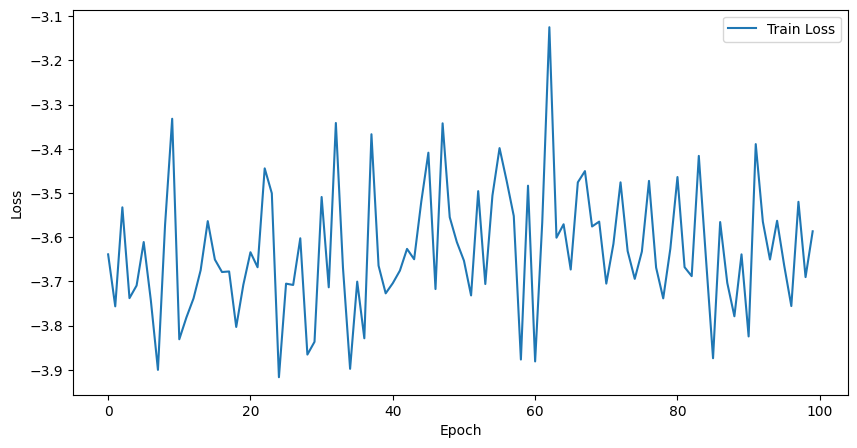

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label="Train Loss")
# plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [3]:
model = QuartzNet(num_features=num_features, num_classes=num_classes)
model.load_state_dict(torch.load('quartznet_100_2.pt'))
input = torch.randn(16,64,2521).permute(0,2,1)
input_names = 'audio'
output_names = 'text'
output = model(input)
torch.onnx.export(model, input, 'quartznet.onnx', input_names=input_names, output_names=output_names)

NameError: name 'QuartzNet' is not defined

In [ ]:
import torch
import youtokentome as yttm
from typing import List, Union
device = 'cuda:3'
class QuartzNetDecoder:
    def __init__(self, bpe_model_path: str):
        """
        Initialize decoder with BPE model
        
        Args:
            bpe_model_path: Path to trained BPE model
        """
        self.bpe = yttm.BPE(model=bpe_model_path)
    
    def decode_greedy(self, log_probs: torch.Tensor) -> List[str]:
        """
        Decode model output using greedy decoding
        
        Args:
            log_probs: Model output tensor of shape (time, batch, vocab_size)
            
        Returns:
            List of decoded text strings
        """
        # Convert log probabilities to probabilities and get best paths
        probs = torch.exp(log_probs)
        best_paths = torch.argmax(probs, dim=-1)  # Shape: (time, batch)
        
        # Transpose to (batch, time) for easier processing
        best_paths = best_paths.transpose(0, 1).cpu().numpy()
        
        decoded_texts = []
        for sequence in best_paths:
            # Remove consecutive duplicates (CTC collapse)
            collapsed = []
            prev_token = None
            for token in sequence:
                if token != 0 and token != prev_token:  # 0 is assumed to be blank token
                    collapsed.append(token)
                prev_token = token
            
            # Decode the sequence using BPE
            if collapsed:
                decoded_text = self.bpe.decode([collapsed])[0]
                decoded_texts.append(decoded_text)
            else:
                decoded_texts.append("")
                
        return decoded_texts
    
    def decode_beam_search(self, log_probs: torch.Tensor, beam_width: int = 5) -> List[str]:
        """
        Decode model output using beam search
        
        Args:
            log_probs: Model output tensor of shape (time, batch, vocab_size)
            beam_width: Number of beams to maintain
            
        Returns:
            List of decoded text strings
        """
        batch_size = log_probs.size(1)
        decoded_texts = []
        
        # Process each batch item separately
        for batch_idx in range(batch_size):
            sequence_log_probs = log_probs[:, batch_idx, :]  # Shape: (time, vocab_size)
            
            # Initialize beam
            beams = [([], 0.0)]  # (sequence, log_probability)
            
            # Process each timestep
            for t in range(sequence_log_probs.size(0)):
                new_beams = []
                
                # Expand each beam
                for sequence, score in beams:
                    probs = sequence_log_probs[t].detach().cpu().numpy()
                    top_indices = probs.argsort()[-beam_width:][::-1]
                    
                    for idx in top_indices:
                        new_sequence = sequence + [idx]
                        new_score = score + probs[idx]
                        new_beams.append((new_sequence, new_score))
                
                # Keep top beam_width beams
                beams = sorted(new_beams, key=lambda x: x[1], reverse=True)[:beam_width]
            
            # Get best sequence
            best_sequence = beams[0][0]
            
            # Remove consecutive duplicates and blank tokens
            collapsed = []
            prev_token = None
            for token in best_sequence:
                if token != 0 and token != prev_token:
                    collapsed.append(token)
                prev_token = token
            
            # Decode using BPE
            if collapsed:
                decoded_text = self.bpe.decode([collapsed])[0]
                decoded_texts.append(decoded_text)
            else:
                decoded_texts.append("")
        
        return decoded_texts

def test(model,test_loader , bpe_model_path):
    # Example usage
    decoder = QuartzNetDecoder(bpe_model_path)
    for input, target, input_lengths, target_lengths in test_loader:
        input = input.to(device)
        input = input.permute(0, 2, 1) 
        logits = model(input) 
        log_probs = F.softmax(logits, dim=-1)
        log_probs = log_probs.permute(1, 0, 2)
        
        greedy_results = decoder.decode_greedy(log_probs)
        print(f"Greedy Decoding Results:{greedy_results}")
        with open('result_greedy.txt', 'w') as f:
            for item in greedy_results:
                f.write("%s\n" % item)
        
        beam_results = decoder.decode_beam_search(log_probs, beam_width=5)
        print(f"Beam Search Decoding Results:{beam_results}")
        with open('results_beam.txt', 'w') as f:
            for item in beam_results:
                f.write("%s\n" % item)
        true = decoder.bpe.decode([target[0].cpu().numpy()])
        print(f"True{true}")
        break

x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')  
test_dataset = SpeechDataset(x_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=16, collate_fn=collate_fn)
bpe_model_path = 'vietnamese_bpe.model'
model = QuartzNet(num_features=2521, num_classes=8000)
model.load_state_dict(torch.load('quartznet_100_3.pt'))
model.to(device)
test(model, test_loader, bpe_model_path)

/tmp/ipykernel_398371/3160599468.py:140: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('quartznet_100_3.pt'))


Greedy Decoding Results:['kàmuuvcu<UNK><BOS>bv<UNK><BOS> <BOS><EOS><BOS><BOS><BOS>npộbiuv<BOS>vubcà<BOS>h<BOS>bvao<BOS>bhivyoui<BOS><UNK><BOS>đmrsnc<UNK>u<EOS>ti<UNK>uka<UNK>uđyclm<EOS>đi<BOS>rcgm<BOS>gyl<UNK>u<BOS><BOS>b<BOS>ếvàuu đ<BOS>k<BOS>kcô<BOS>n<UNK><BOS>huop<BOS>iđ<BOS>ut<BOS>nhuygi<UNK> <BOS>i<EOS>o<BOS>uạn<EOS>bu<UNK>uhđlếđu<UNK>ođiyc<BOS>us<EOS>vurđva<BOS>i<UNK><BOS><UNK>đ<EOS>u<BOS>yp<EOS><BOS><BOS>igi<EOS><BOS>đinctb<BOS><EOS>óukratuiuđn<EOS>b<BOS><EOS>uđ<BOS><EOS>áouáh<BOS><BOS>gđcđn<UNK><BOS>y<BOS>luộvniđyc<UNK><BOS>uy<BOS>hiáộ<BOS><BOS>iđh<BOS>uáóyđ<BOS>ny<BOS>bacu<BOS>à<BOS>uiacoigmulvàc đn<EOS><BOS>đ<BOS>độvo<BOS>vuuếm<EOS>hunkoà<BOS>uộtđ<BOS>p<BOS>a<BOS><BOS>ộmđbnu<BOS>pế<BOS>oimih <BOS>ug<BOS>uproàbđl<UNK>ubigyth<BOS>uàócg<BOS>ộ<BOS>im<UNK>u<BOS>áa<BOS>ộđikio<BOS><EOS>óo<EOS>u<EOS>viut<BOS><UNK>à<BOS>u<BOS>n<BOS><EOS>y<BOS>vđ<UNK><BOS>đcđ<EOS>ạ<UNK>đáđig<BOS>ul<BOS>uclb<UNK>ến<BOS>p<UNK><UNK>su<BOS>p<EOS><UNK>áiuđphếà <BOS>b<EOS>n<UNK>imavutkiviđsếhu inv ếv<BOS>ktm

In [ ]:
# def train_model(model: nn.Module, train_loader: DataLoader, 
#                 val_loader: DataLoader, config: ASRConfig) -> nn.Module:
#     """Training function"""
#     device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#     model = model.to(device)
    
#     optimizer = torch.optim.AdamW(
#         model.parameters(),
#         lr=config.learning_rate,
#         weight_decay=config.weight_decay
#     )
    
#     scheduler = torch.optim.lr_scheduler.OneCycleLR(
#         optimizer,
#         max_lr=config.learning_rate,
#         epochs=config.max_epochs,
#         steps_per_epoch=len(train_loader)
#     )
    
#     criterion = nn.CTCLoss(blank=0, zero_infinity=True)
    
#     for epoch in range(config.max_epochs):
#         model.train()
#         train_loss = 0.0
        
#         for batch_idx, (specs, transcripts) in enumerate(train_loader):
#             specs = specs.to(device)
            
#             optimizer.zero_grad()
            
#             outputs = model(specs)
            
#             # Calculate loss (you'll need to implement proper CTC loss calculation)
#             loss = criterion(outputs, transcripts)
            
#             loss.backward()
#             optimizer.step()
#             scheduler.step()
            
#             train_loss += loss.item()
            
#         # Validation
#         model.eval()
#         val_loss = 0.0
        
#         with torch.no_grad():
#             for specs, transcripts in val_loader:
#                 specs = specs.to(device)
#                 outputs = model(specs)
#                 loss = criterion(outputs, transcripts)
#                 val_loss += loss.item()
        
#         print(f"Epoch {epoch+1}/{config.max_epochs}")
#         print(f"Train Loss: {train_loss/len(train_loader):.4f}")
#         print(f"Val Loss: {val_loss/len(val_loader):.4f}")
    
#     return model

# def quantize_model(model: nn.Module) -> nn.Module:
#     """Quantize model to INT8"""
#     model.qconfig = torch.quantization.get_default_qconfig('fbgemm')
#     torch.quantization.prepare(model, inplace=True)
#     torch.quantization.convert(model, inplace=True)
#     return model

# def export_model(model: nn.Module, path: str):
#     """Export model to ONNX format"""
#     dummy_input = torch.randn(1, 80, 500)  # Example input shape
#     torch.onnx.export(model, dummy_input, path, 
#                      input_names=['input'], 
#                      output_names=['output'],
#                      dynamic_axes={'input': {0: 'batch_size', 2: 'sequence_length'},
#                                  'output': {0: 'batch_size', 1: 'sequence_length'}})

In [ ]:
# def beamSearch(predict, width):
#     # Initialize the beam search
#     beam = [(list(), 1.0)]
    
#     # Step through each prediction
#     for i in range(len(predict)):
#         next_beam = list()
        
#         # Expand each beam
#         for prefix, prob in beam:
#             if len(prefix) > 0:
#                 last = prefix[-1]
#             else:
#                 last = None
            
#             # Add each token to the prefix
#             for j, p in enumerate(predict[i]):
#                 if last == j:
#                     continue
                
#                 # Calculate the new probability
#                 new_prob = prob * p
                
#                 # Add the new prefix to the next beam
#                 next_beam.append((prefix + [j], new_prob))
        
#         # Sort the beam
#         beam = sorted(next_beam, key=lambda x: x[1], reverse=True)
        
#         # Keep only the top `width` prefixes
#         beam = beam[:width]
    
#     return beam

In [ ]:
# x_train = np.load('x_train.npy')
# y_train = np.load('y_train.npy')
# x_val = np.load('x_val.npy')
# y_val = np.load('y_val.npy')


# train_loader = DataLoader(x_train-, batch_size=32, shuffle=True)
# config = ASRConfig()
# model = VietnameseASR(config)

# trained_model = train_model(model, train_loader, val_loader, config)
# quantized_model = quantize_model(trained_model)
# export_model(quantized_model, 'asr_model.onnx')

